## 차원축소
### 02. PCA(Principal Component Analysis)
- 공분산 행렬을 이용한 차원축소
- Iris dataset 을 이용한 PCA 실습

In [2]:
# 데이터 로딩, 구조 확인(피처 구조 확인)

import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris = load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [16]:
columns = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(iris.data, columns=columns)
iris_df['TARGET'] = iris.target

In [17]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,TARGET
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
iris_df.TARGET.value_counts()  
# 타겟분포가 균일

2    50
1    50
0    50
Name: TARGET, dtype: int64

In [20]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Text(0, 0.5, 'sepal width')

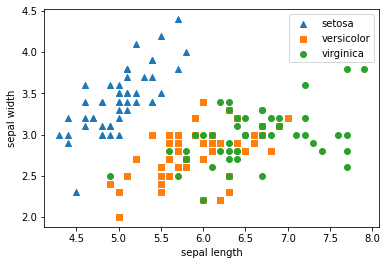

In [23]:
# sepal_length, sepal_width => label 시각화
markers = ['^','s','o']     # 답에 따른 마커 모양, 0:삼각형,1:사각형, 2: 원형

for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df.TARGET ==i]['sepal_length']
    y_axis_data = iris_df[iris_df.TARGET==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label = iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')

- setosa 는 괜찮지만, versicolor와 virginica 는 섞여있어서 분류하기에 오차가 클 가능성이 있다
- 차원을 틀어서 더 잘분리되도록 함 -> PCA

In [24]:
# PCA 적용(차원을 틀어서 답을 더 잘 분리할수있도록 함.)
# 표준화
from sklearn.preprocessing import StandardScaler
# 답 제외하고 데이터 표준화 처리.
iris_scaled=StandardScaler().fit_transform(iris_df.iloc[:,:-1])
# PCA 처리
from sklearn.decomposition import PCA  # 분해
# PCA 객체 생성
pca = PCA(n_components=2)  # n_componensts : PCA 로 변환할 차원의 수를 의미
pca.fit(iris_scaled)   # 비지도 학습(답이 없다)

# 위에서 학습시킨 pca 객체로, 새로운 압축피처들이 담긴 iris_pca 만들기 
iris_pca=pca.transform(iris_scaled)  # 위에서 지정한 n차원의 ndarray 가 반환됨

# 위의 ndarray를 데이터프레임으로 변환
iris_df_pca= pd.DataFrame(
    iris_pca, columns=['com1','com2']
)
iris_df_pca.head()

,com1,com2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [25]:
# 차원 압축된 New 데이터 프레임에, Target 컬럼 추가
iris_df_pca['TARGET']= iris.target
iris_df_pca.head()

,com1,com2,TARGET
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


Text(0, 0.5, 'com2')

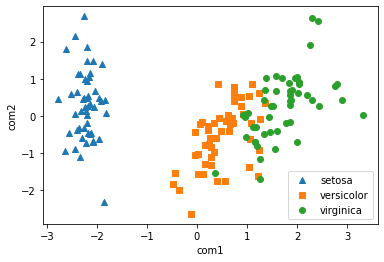

In [28]:
# 시각화
# sepal_length, sepal_width => label 시각화
markers = ['^','s','o']     # 답에 따른 마커 모양, 0:삼각형,1:사각형, 2: 원형

for i, marker in enumerate(markers):
    x_axis_data = iris_df_pca[iris_df_pca.TARGET ==i]['com1']
    y_axis_data = iris_df_pca[iris_df_pca.TARGET==i]['com2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label = iris.target_names[i])
    
plt.legend()
plt.xlabel('com1')
bplt.ylabel('com2')

- 더 잘 분리되었다. 즉 데이터 전처리가 잘 된것이라고 생각할 수 있다.
- 이제 분류 알고리즘을 이용해 예측을 해보자 
     - 분리가 더 잘된 상태니, 예측 성능이 더 좋아질 것이라고 예상할 수 있다.
- 비교해서 확인해보기

In [37]:
# PCA 변환하지 않은 모델
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)

print('### PCA 변환 미적용 ####')
print('CV3으로 교차 검증한 RandomForrest Classifier 의 정확도 :', scores)


### PCA 변환 미적용 ####
CV3으로 교차 검증한 RandomForrest Classifier 의 정확도 : [0.98 0.94 0.96]


In [36]:
# PCA 변환한 모델
pca_X = iris_df_pca[['com1','com2']]
scores = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)

print('### PCA 변환 적용 ####')
print('CV3으로 교차 검증한 RandomForrest Classifier 의 정확도 :', scores)

### PCA 변환 적용 ####
CV3으로 교차 검증한 RandomForrest Classifier 의 정확도 : [0.88 0.88 0.88]


- 차원이 축소되면서 정확도가 떨어진다.
- 그러나 속성이 50%가 감소했음에도 여전히 0.88 수준을 유지하고 있다. 


- 복잡한 피처구조를 가진 데이터의, 분류 예측을 위해서는 PCA 가 막강한 스킬이 될수있다.